# Laboratorio 3.

## Procesando texto usando Scikit-Learn


### Procesamineto de texto básico con SciKit Learn

SciKit Learn es una biblioteca de Python de código abierto para el aprendizaje de máquinas que viene con instalaciones básicas para el procesamiento de texto para apoyar el agrupamiento y clasificación, incluyendo tokenización, conteo de palabras y stemming (Obtener la forma raíz de las palabras).

En este lab práctico vamos a revisar brevemente cómo utilizar Scikit Learn en Python y luego observar con más detalle en las instalaciones de procesamiento previo.


### El uso de [Scikit Learn](http://scikit-learn.org/)

- [Github](https://github.com/scikit-learn/scikit-learn)


In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

Ejemplo de uso:

In [10]:
data = np.array([[1,2],[2,3],[3,4],[4,5]])
x = data[:,0]
y = data[:,1]

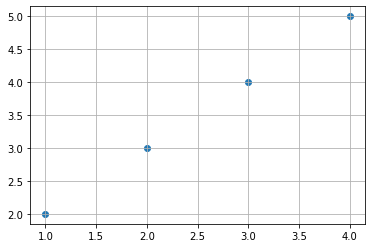

In [4]:
plt.scatter(x,y)
plt.grid(True)
plt.show()

### Preprocesamiento de Texto con Scikit Learn

Muchas de las aplicaciones de análisis de texto que vamos a considerar requerir tomar un texto (ej: un post), tokenizar, y utilizando los tokens como features, posiblemente después de la eliminación de palabras con lematización/stop words. Con Scikit Learn no necesitamos escribir código para hacer eso; podemos usar la clase CountVectorizer en su lugar. Una instancia de la clase se crea de la siguiente manera:

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
vectorizer = CountVectorizer(min_df = 1)

Una vez que hemos creado la instancia, podemos utilizarlo para extraer una bolsa de palabras.

La representación de una colección de documentos utilizando el método de Scikit Learn `fit_transform`. En este primer ejemplo de prueba, usamos una lista de cadenas como documentos, de la siguiente manera:

In [14]:
content = ["How to format my hard disk", "Hard disk format problems"]

In [15]:
X = vectorizer.fit_transform(content)

`fit_transform` ha extraído siete características de los dos "documentos"; podemos ver esto con el método `get_feature_names()`

In [17]:
vectorizer.get_feature_names()

['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']

Se puede ver cuántas veces cada una de estas siete features se produce en los dos documentos haciendo:

In [18]:
X.toarray()

array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]])

Tenga en cuenta que esta llamada devuelve una matriz de dos filas, una por cada documento. Cada fila de siete elementos. Cada elemento especifica el número de elementos de una determinada feature se produjo en ese documento:

In [19]:
X.toarray()[0]

array([1, 1, 1, 1, 1, 0, 1])

Nos da el vector sólo para el primer documento que contiene todas las palabras elegidas como las features.

`CountVectorizer` tiene una serie de opciones muy útiles, que se detallan en su [página](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.ht)

Veamos ahora cómo funciona esto con una verdadera colección de documentos.

Vamos a utilizar los datos del dataset '20 Newsgroup' que es una colección de alrededor de 20000 documentos procedentes de 20 grupos de noticias diferentes, que se utiliza comúnmente en experimentos de clasificacion de texto y la agrupación de texto.

- [Set de datos](http://qwone.com/~jason/20Newsgroups/)

Pero ya está incluido en Scikit Learn y se puede cargar haciendo:

In [21]:
from sklearn.datasets import fetch_20newsgroups

Para acelerar las cosas, en el resto del laboratorio sólo utilizaremos un subconjunto de los documentos, los que pertenecen a las siguientes 4 categorías.

In [22]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

Podemos importar los documentos pertenecientes a las categorías de la siguiente manera:

In [23]:
twenty_train = fetch_20newsgroups(subset = 'train', categories = categories, shuffle=True, random_state = 42)

Los archivos han sido cargados en el atributo data del objeto twenty_train
Vamos ahora a crear un nuevo objeto CountVectorizer

In [24]:
vectorizer = CountVectorizer()

Una vez más la función `fit_transform` se puede utilizar para tokenizar cada documento, identificar las palabras más relevantes, construir un diccionario de tales palabras, y crear para cada documento una representación vectorial en el que las palabras son las features y el valor de estas features es el número de ocurrencias de cada palabra en un documento.

Al igual que en ejemplo de la prueba anterior:

In [25]:
train_counts = vectorizer.fit_transform(twenty_train.data)

Por ejemplo, si ahora queremos ver la frecuencia de la palabra 'algorithm' en 20NewGroups:

In [26]:
vectorizer.vocabulary_.get('algorithm')

4690

Para ver cuántos términos fueron extraidos, podemos utilizar get_feature_names() que hemos visto anteriormente:

In [27]:
len(vectorizer.get_feature_names())

35788

La clase `CountVectorizer` de Scikit Learn puede hacer más procesamiento previo de una colección de documentos que simples tokenizaciones.
Una importante etapa de preprocesamiento adicional de que la clase puede llevar a cabo es la eliminación de stop_words

Esto se puede hacer mediante la especificación de un parámetro:

In [28]:
vectorizer = CountVectorizer(stop_words='english')

Para ver qué palabras son stop words hacé lo siguiente:

In [29]:
sorted(vectorizer.get_stop_words())[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

Para hacer stemming (tener la palabra raíz) y un pre procesamiento más avanzado, necesitamos complementar Scikit Learn con NLTK

## Preprocesamiento más avanzado con NLTK

[NLTK](http://www.nltk.org/book/) es compatible con la mayoría de los tipos de procesamiento previo. También viene con varios recursos útiles como corpus y el léxico.

El stemming en NLTK incluye implementaciones de varios algoritmos muy conocidos y utilizados, incluyendo el Porter Stemmer y el Lancaster Stemmer.

Para crear un stemmer en ingles se tiene que hacer lo siguiente:


In [31]:
import nltk
s = nltk.stem.SnowballStemmer('english')

Después de crear el steammer, a continuación, puede utilizarlo para llevar a la raíz, palabras de la siguiente manera:

In [32]:
s.stem('cats')

'cat'

In [33]:
s.stem('loving')

'love'

Otros tipos de pre-procesamiento de NLTK incluye implementaciones de muchos de los módulos de procesamiento previo y analizadores sintácticos que discutimos o discutiremos en clase:

- Identificadores de idioma
- Tokenizers para varios idiomas
- Divisores de oraciones
- POS tagger
- Chunkers
- Parsers

Además NLTK incluye implementaciones de los aspectos del análisis de texto que vamos a discutir en este módulo, incluyendo:

- NER
- Análisis de los sentimientos
- Extraer información de los medios de redes sociales

Por ejemplo, las instrucciones siguientes:

In [34]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
text = word_tokenize('And now for something completely different')

[nltk_data] Downloading package punkt to /home/swaxtech/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


producir una versión tokenizada de la frase, que luego puede ser alimentado en el POS Tagger

In [36]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_treebank_pos_tagger')
nltk.pos_tag(text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/swaxtech/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /home/swaxtech/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

## Integración del Stemmer de NLTK con el CountVectorizer de Scikit Learn

El stemmer de NLTK puede ser utilizado antes de la alimentacion en CountVectorizer de Scikit Learn obteniendo así un índice más compacto.
Una forma de hacer esto es definir una nueva clase StemmedCountVectorizer
Extendiendo de CountVectorizer y redefiniendo el [metodo `build_analizer()`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) que se encarga de pre-procesamiento y tokenización:

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
analyze = vectorizer.build_analyzer()
analyze('Jhon bought carrots and potatoes')

['jhon', 'bought', 'carrots', 'potatoes']

Si modificamos `build_analyzer()` para aplicar el stemmer de NLTK a la salida del método `build_analyzer()`, obtenemos una versión que deriva así:

In [39]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

Ahora podemos crear una instancia de nuestra clase:

In [41]:
stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words = 'english')
stem_analyze = stem_vectorizer.build_analyzer()

In [42]:
y = stem_analyze('Jhon bought carrots and potatoes')

for tok in y:
    print(tok)

jhon
bought
carrot
potato


Si usamos este vectorizer para extraer features para el subconjunto del dataset 20_newsgroups que consideramos antes, vamos a tener un menor número de features:

In [44]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism','soc.religion.christian','comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
train_counts = stem_vectorizer.fit_transform(twenty_train.data)
len(stem_vectorizer.get_feature_names())

26888

# Implementación en español

In [45]:
import nltk.stem
spanish_stemmer = nltk.stem.SnowballStemmer('spanish')

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (spanish_stemmer.stem(w) for w in analyzer(doc))

In [50]:
stem_vectorizer = StemmedCountVectorizer(min_df=1)
stem_analyze = stem_vectorizer.build_analyzer()

y = stem_analyze('Juán compró zanahorias y papas')

for tok in y:
    print(tok)

juan
compr
zanahori
pap


In [54]:
import nltk
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.words()
corpus

[nltk_data] Downloading package cess_esp to
[nltk_data]     /home/swaxtech/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [55]:
train_counts = stem_vectorizer.fit_transform(corpus)
len(stem_vectorizer.get_feature_names())

14060